# HeatMap or Area Chart
Visualize the frequency of unusual activities (like pacing or falling) across different camera zones over a 24-hour period.

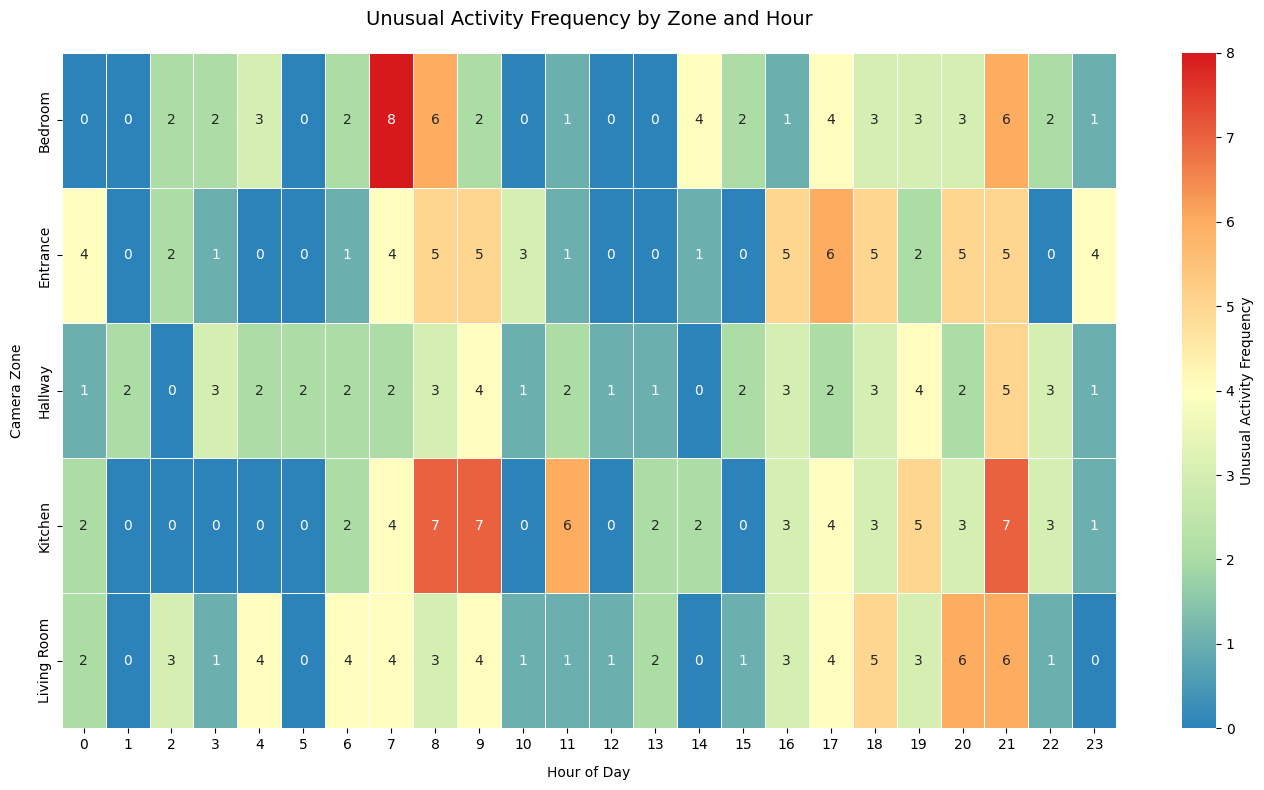

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Generate sample data (replace with your actual data)
np.random.seed(42)
zones = ['Entrance', 'Hallway', 'Kitchen', 'Living Room', 'Bedroom']
hours = list(range(24))
data = []

for zone in zones:
    for hour in hours:
        base = np.random.poisson(lam=2)
        if 7 <= hour <= 9 or 17 <= hour <= 21:
            activity = base + np.random.randint(1, 5)
        else:
            activity = max(0, base - np.random.randint(0, 2))
        data.append({'Zone': zone, 'Hour': hour, 'Activity': activity})

df = pd.DataFrame(data)

# Create custom colormap
colors = ["#2b83ba", "#abdda4", "#ffffbf", "#fdae61", "#d7191c"]
cmap = LinearSegmentedColormap.from_list("activity_cmap", colors)

# Heatmap
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(
    data=df.pivot(index="Zone", columns="Hour", values="Activity"),
    cmap=cmap,
    annot=True,
    fmt="d",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={'label': 'Unusual Activity Frequency'}
)

plt.title("Unusual Activity Frequency by Zone and Hour", pad=20, fontsize=14)
plt.xlabel("Hour of Day", labelpad=10)
plt.ylabel("Camera Zone", labelpad=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



# Grouped Bar Chart
Show how many events per category (entry, loitering, inactivity) were detected in each room over the past week.


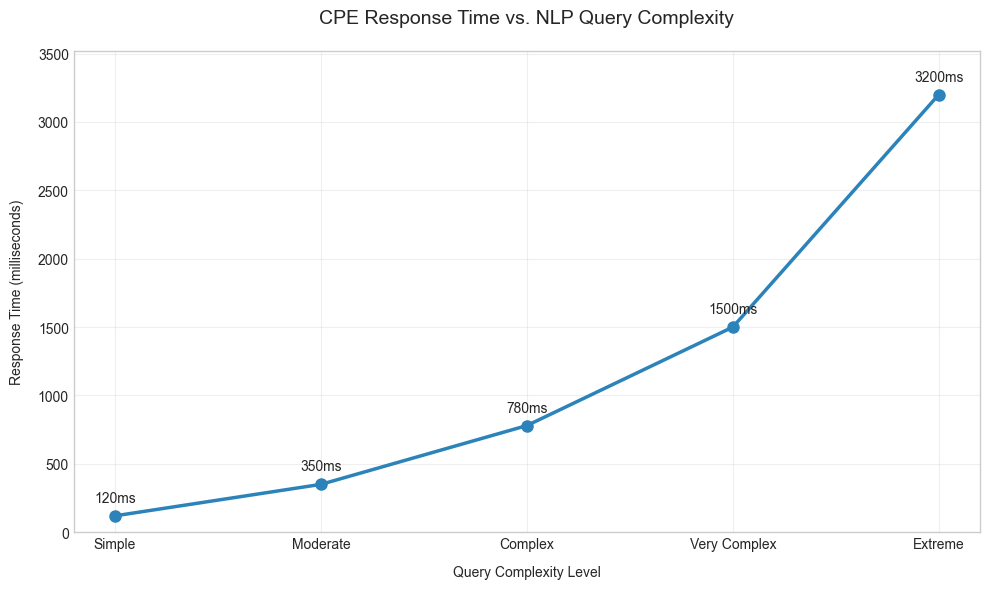

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data - replace with your actual measurements
query_complexity = ['Simple', 'Moderate', 'Complex', 'Very Complex', 'Extreme']
response_times = [120, 350, 780, 1500, 3200]  # in milliseconds

# Create DataFrame
data = pd.DataFrame({
    'Query Complexity': query_complexity,
    'Response Time (ms)': response_times
})

# Plot styling
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Create line plot with markers
plt.plot(data['Query Complexity'], data['Response Time (ms)'], 
         marker='o', markersize=8, linewidth=2.5, color='#2b83ba')

# Add annotations for each point
for i, rt in enumerate(response_times):
    plt.annotate(f"{rt}ms", 
                (query_complexity[i], response_times[i]),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

# Chart formatting
plt.title('CPE Response Time vs. NLP Query Complexity', pad=20, fontsize=14)
plt.xlabel('Query Complexity Level', labelpad=10)
plt.ylabel('Response Time (milliseconds)', labelpad=10)
plt.ylim(0, max(response_times)*1.1)
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()


# Box Plot
Compare the latency of event detection for three ViT model variants across different edge hardware setups.


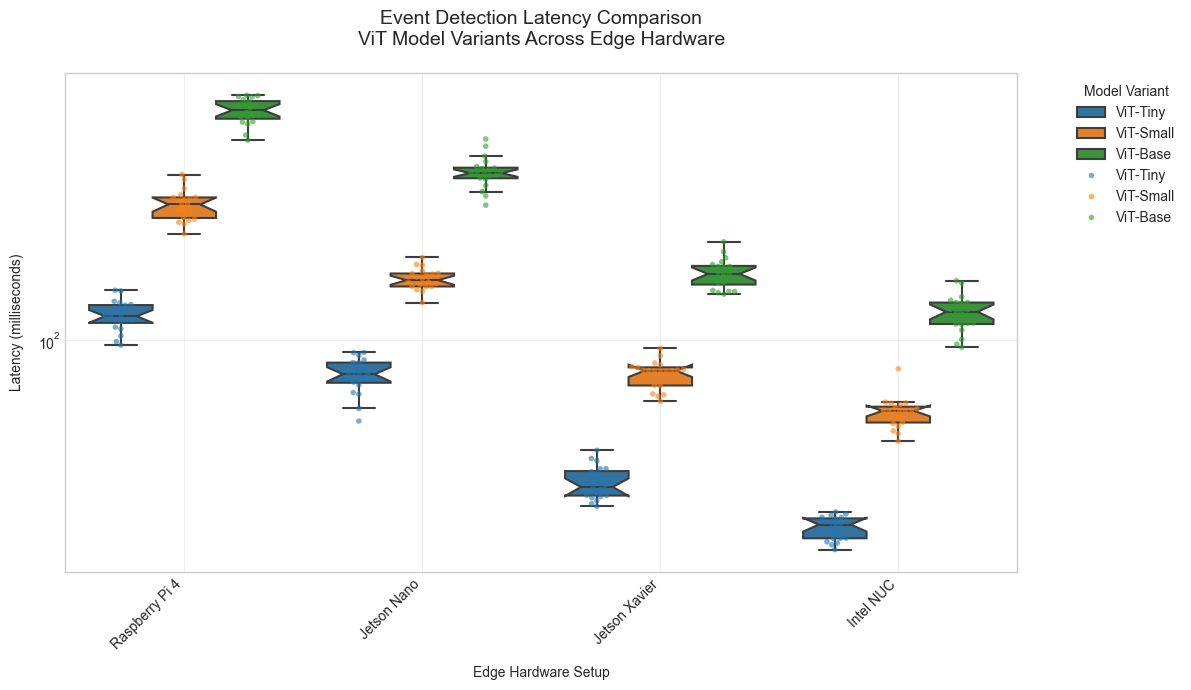

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data - replace with your actual measurements
np.random.seed(42)
hardware_setups = ['Raspberry Pi 4', 'Jetson Nano', 'Jetson Xavier', 'Intel NUC']
model_variants = ['ViT-Tiny', 'ViT-Small', 'ViT-Base']

# Generate realistic latency data (ms) for each combination
data = []
for hardware in hardware_setups:
    for model in model_variants:
        if hardware == 'Raspberry Pi 4':
            base_latency = {'ViT-Tiny': 120, 'ViT-Small': 250, 'ViT-Base': 450}[model]
        elif hardware == 'Jetson Nano':
            base_latency = {'ViT-Tiny': 80, 'ViT-Small': 150, 'ViT-Base': 300}[model]
        elif hardware == 'Jetson Xavier':
            base_latency = {'ViT-Tiny': 40, 'ViT-Small': 80, 'ViT-Base': 150}[model]
        else:  # Intel NUC
            base_latency = {'ViT-Tiny': 30, 'ViT-Small': 60, 'ViT-Base': 120}[model]
        
        # Add some variation
        latencies = np.random.normal(base_latency, base_latency*0.1, 20)
        for latency in latencies:
            data.append({
                'Hardware': hardware,
                'Model': model,
                'Latency (ms)': max(10, latency)  # Ensure no negative values
            })

df = pd.DataFrame(data)

# Plot styling
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
palette = {'ViT-Tiny': '#1f77b4', 'ViT-Small': '#ff7f0e', 'ViT-Base': '#2ca02c'}

# Create box plot
sns.boxplot(
    data=df,
    x='Hardware',
    y='Latency (ms)',
    hue='Model',
    palette=palette,
    linewidth=1.5,
    showfliers=False,  # Hide outliers for cleaner visualization
    notch=True        # Show confidence intervals
)

# Add swarm plot for actual data points
sns.swarmplot(
    data=df,
    x='Hardware',
    y='Latency (ms)',
    hue='Model',
    palette=palette,
    size=4,
    dodge=True,
    alpha=0.6
)

# Chart formatting
plt.title('Event Detection Latency Comparison\nViT Model Variants Across Edge Hardware', 
          pad=20, fontsize=14)
plt.xlabel('Edge Hardware Setup', labelpad=10)
plt.ylabel('Latency (milliseconds)', labelpad=10)
plt.yscale('log')  # Log scale for better visualization of wide ranges
plt.grid(True, alpha=0.3)
plt.legend(title='Model Variant', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Line Chart
Plot how the CPE’s response time changes with increasing NLP query complexity.


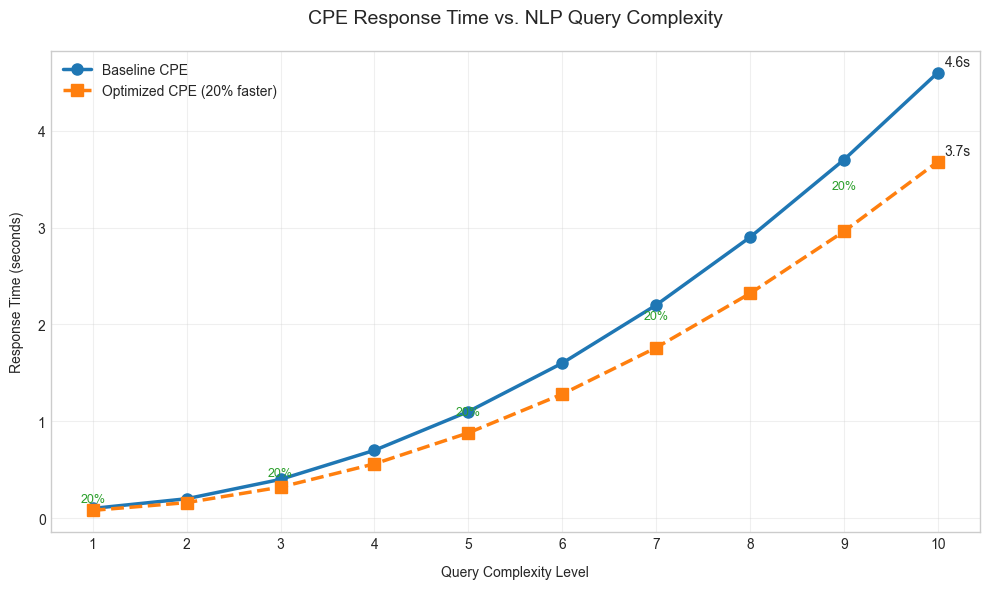

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Data
query_complexity = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
response_time_baseline = np.array([0.1, 0.2, 0.4, 0.7, 1.1, 1.6, 2.2, 2.9, 3.7, 4.6])
response_time_optimized = response_time_baseline * 0.8

# Setup plot
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Plot lines with markers
plt.plot(query_complexity, response_time_baseline, 
         marker='o', markersize=8, linewidth=2.5, 
         color='#1f77b4', label='Baseline CPE')

plt.plot(query_complexity, response_time_optimized, 
         marker='s', markersize=8, linewidth=2.5, 
         color='#ff7f0e', linestyle='--', label='Optimized CPE (20% faster)')

# Formatting
plt.title('CPE Response Time vs. NLP Query Complexity', pad=20, fontsize=14)
plt.xlabel('Query Complexity Level', labelpad=10)
plt.ylabel('Response Time (seconds)', labelpad=10)
plt.xticks(query_complexity)
plt.grid(True, alpha=0.3)

# Add data labels for max complexity
plt.annotate(f'{response_time_baseline[-1]:.1f}s', 
             (query_complexity[-1], response_time_baseline[-1]),
             textcoords="offset points", xytext=(5,5), ha='left')

plt.annotate(f'{response_time_optimized[-1]:.1f}s', 
             (query_complexity[-1], response_time_optimized[-1]),
             textcoords="offset points", xytext=(5,5), ha='left')

# Add improvement percentage markers
for i, (base, opt) in enumerate(zip(response_time_baseline, response_time_optimized)):
    improvement = (base - opt)/base * 100
    if i % 2 == 0:  # Show every other to avoid clutter
        plt.annotate(f'{improvement:.0f}%', 
                   (query_complexity[i], (base + opt)/2),
                   textcoords="offset points", xytext=(0,5), ha='center',
                   fontsize=9, color='#2ca02c')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Donut Chart or Pie Chart
Map the percentage of times the AI misinterpreted an event, grouped by event type (e.g., mistook pacing for wandering).


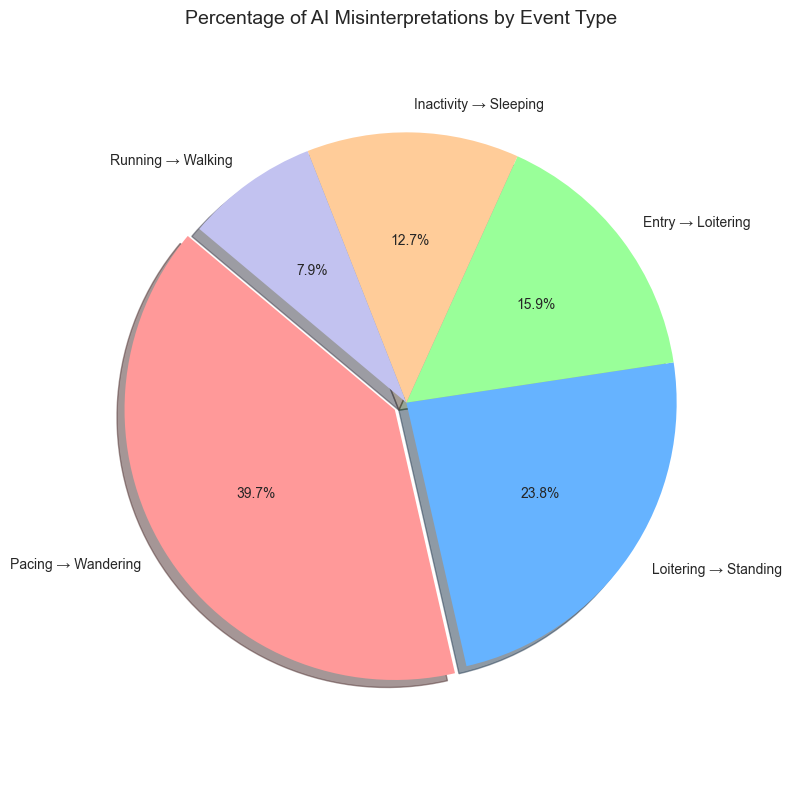

In [13]:
import matplotlib.pyplot as plt

# Data for the pie chart
misinterpretations = {
    'Pacing → Wandering': 25,
    'Loitering → Standing': 15,
    'Entry → Loitering': 10,
    'Inactivity → Sleeping': 8,
    'Running → Walking': 5
}

# Extract labels and sizes
labels = list(misinterpretations.keys())
sizes = list(misinterpretations.values())
total_misinterpretations = sum(sizes)
percentages = [size / total_misinterpretations * 100 for size in sizes]

# Create the pie chart
plt.figure(figsize=(8, 8))  # Make the plot square
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Format percentage labels
    startangle=140,  # Rotate the start of the pie chart
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],  # Custom colors
    explode=(0.05, 0, 0, 0, 0),  # Explode the 1st slice (Pacing -> Wandering)
    shadow=True,  # Add a shadow for depth
    textprops={'fontsize': 10}, #Adjust font size of percentage
)

plt.title('Percentage of AI Misinterpretations by Event Type', fontsize=14)
plt.axis('equal')  # Ensure the pie chart is circular
plt.tight_layout()
plt.show()


# Column Chart
Show how the NLP query success rate varies with different phrasing styles or question templates.


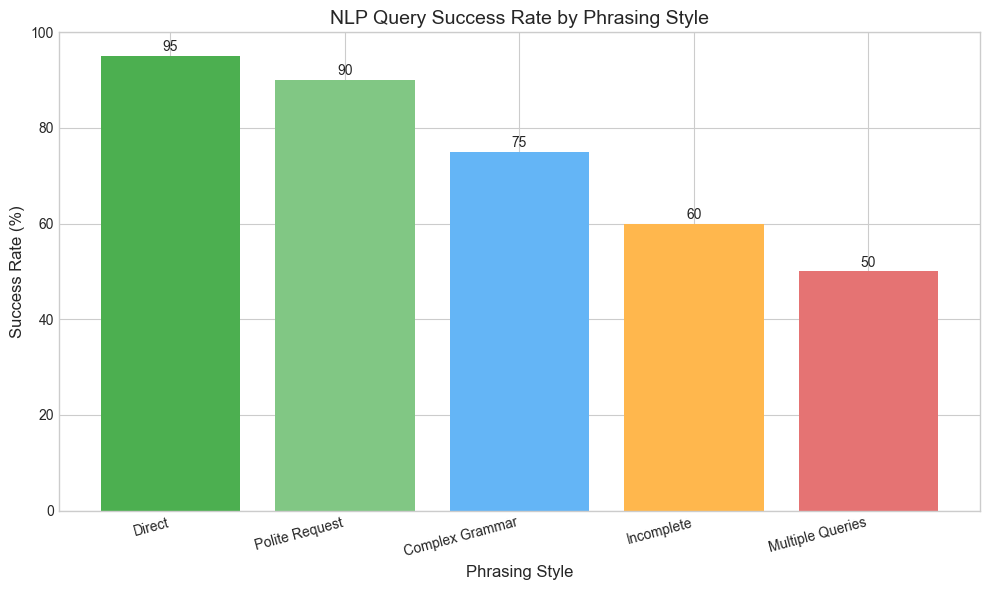

In [15]:
import matplotlib.pyplot as plt

# Simulated phrasing styles and their success rates
phrasing_styles = ['Direct', 'Polite Request', 'Complex Grammar', 'Incomplete', 'Multiple Queries']
success_rates = [95, 90, 75, 60, 50]  # in percentage

# Create the column chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(phrasing_styles, success_rates, color=['#4CAF50', '#81C784', '#64B5F6', '#FFB74D', '#E57373'])  # Use different colors

# Add labels and title
plt.title('NLP Query Success Rate by Phrasing Style', fontsize=14)
plt.xlabel('Phrasing Style', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.ylim(0, 100)  # Set the y-axis limit to 0-100 for percentage
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability

# Add value labels above the bars
for i, v in enumerate(success_rates):
    plt.text(phrasing_styles[i], v + 1, str(v), ha='center', fontsize=10)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



# Bar Chart
Compare the average frame-processing time per camera when using different ViT architectures.


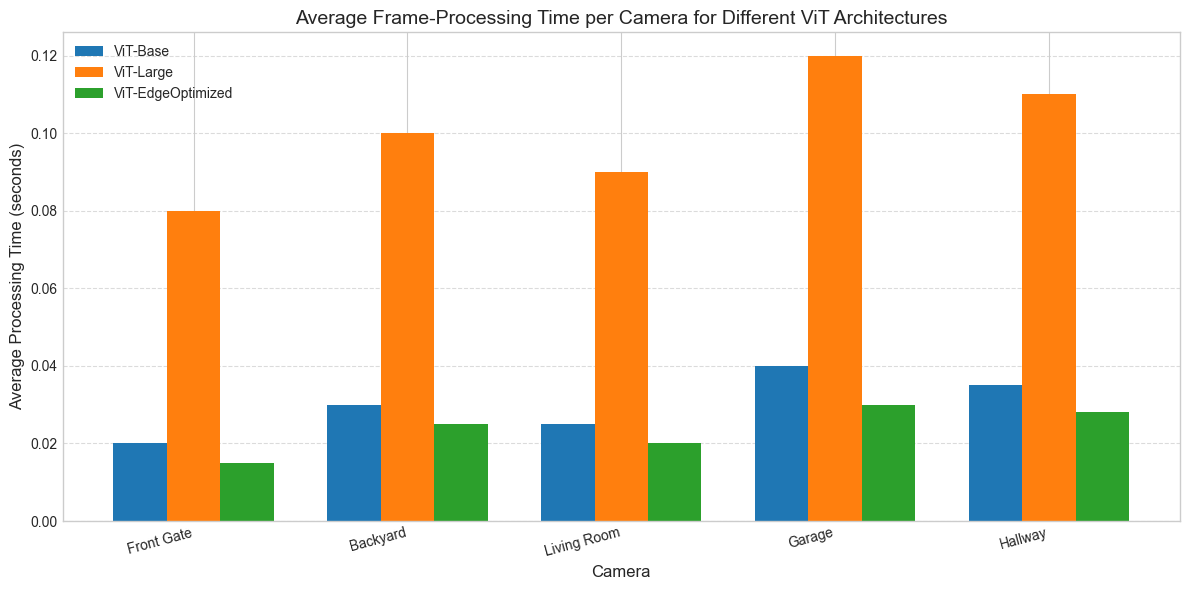

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data for average frame-processing time (in seconds)
# In a real scenario, you would replace this with your actual measurements
cameras = ['Front Gate', 'Backyard', 'Living Room', 'Garage', 'Hallway']
vit_models = ['ViT-Base', 'ViT-Large', 'ViT-EdgeOptimized']

# Frame processing time data (simulated) - replace with your actual data
processing_times = {
    'ViT-Base': [0.02, 0.03, 0.025, 0.04, 0.035],  # [Front Gate, Backyard, ...]
    'ViT-Large': [0.08, 0.10, 0.09, 0.12, 0.11],
    'ViT-EdgeOptimized': [0.015, 0.025, 0.02, 0.03, 0.028],
}

# Number of cameras and models
num_cameras = len(cameras)
num_models = len(vit_models)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
bar_width = 0.25  # Width of each bar
index = np.arange(num_cameras)  # Positions for the bars

# Plot bars for each ViT model
for i, model in enumerate(vit_models):
    plt.bar(index + i * bar_width, processing_times[model], bar_width, label=model)

# Add labels and title
plt.title('Average Frame-Processing Time per Camera for Different ViT Architectures', fontsize=14)
plt.xlabel('Camera', fontsize=12)
plt.ylabel('Average Processing Time (seconds)', fontsize=12)
plt.xticks(index + bar_width, cameras, rotation=15, ha='right', fontsize=10)  # Rotate camera names
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid for y-axis

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



# Area Chart or Stacked Column Chart
Track the variation in detected behavioral anomalies across weekdays vs weekends.


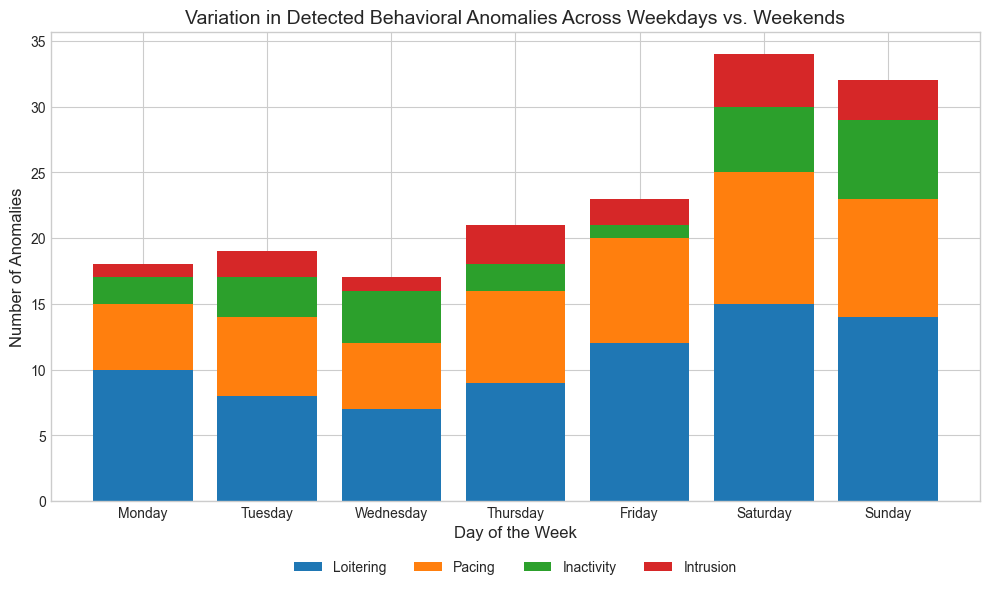

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate anomaly types and days
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
anomaly_types = ['Loitering', 'Pacing', 'Inactivity', 'Intrusion']

# Simulated data: anomalies per day per type
# Replace with your actual data.  Shape should be (len(days), len(anomaly_types))
anomalies_data = np.array([
    [10, 5, 2, 1],  # Monday
    [8, 6, 3, 2],  # Tuesday
    [7, 5, 4, 1],  # Wednesday
    [9, 7, 2, 3],  # Thursday
    [12, 8, 1, 2],  # Friday
    [15, 10, 5, 4],  # Saturday
    [14, 9, 6, 3]   # Sunday
])

# Create the stacked column chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot each anomaly type as a stack
bottom = np.zeros(len(days))  # Start from the x-axis
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Distinct colors for each anomaly type

for i, anomaly_type in enumerate(anomaly_types):
    plt.bar(days, anomalies_data[:, i], bottom=bottom, color=colors[i], label=anomaly_type)
    bottom += anomalies_data[:, i]  # Update the bottom for the next stack

# Add labels and title
plt.title('Variation in Detected Behavioral Anomalies Across Weekdays vs. Weekends', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Anomalies', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(anomaly_types), fontsize=10)  # Legend at the bottom

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



# Violin Plot
Plot the distribution of response latencies for user queries throughout the day.


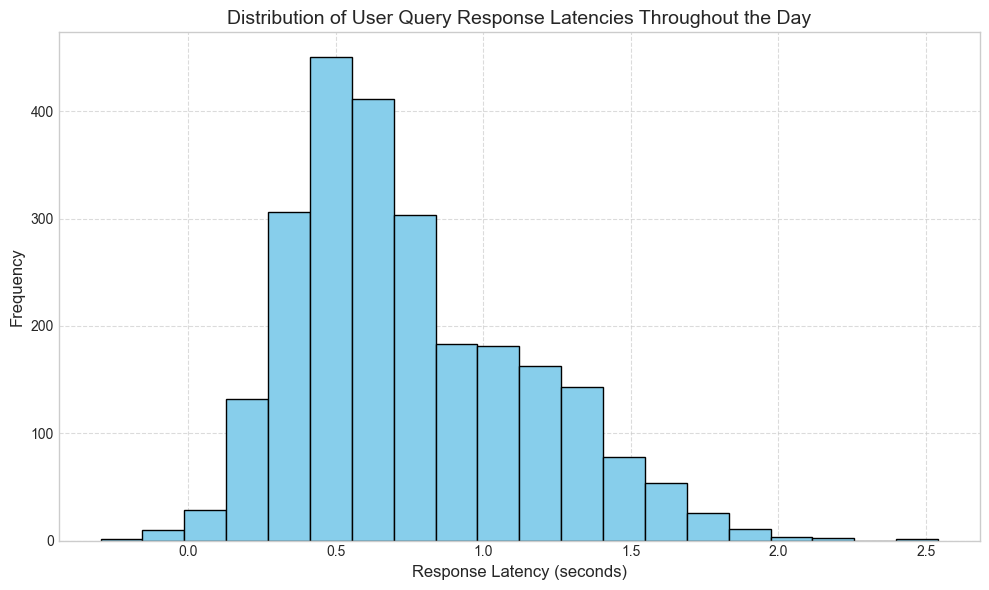

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulate data for response latencies throughout the day
# In a real scenario, you would load this from your data source
np.random.seed(42)  # For reproducibility
hours = np.arange(0, 24)
num_queries_per_hour = np.random.randint(5, 200, 24)  # Varying number of queries per hour

# Generate random latencies with a distribution that changes throughout the day
latencies = []
for hour, num_queries in zip(hours, num_queries_per_hour):
    if 6 <= hour < 18:  # Daytime (faster responses)
        latencies.extend(np.random.normal(loc=0.5, scale=0.2, size=num_queries))
    elif 18 <= hour < 22: # Evening (slightly slower)
        latencies.extend(np.random.normal(loc=1.2, scale=0.3, size=num_queries))
    else:  # Nighttime (slower responses)
        latencies.extend(np.random.normal(loc=1.0, scale=0.4, size=num_queries))

# Create a Pandas DataFrame for easier handling
df = pd.DataFrame({'Hour': np.repeat(hours, num_queries_per_hour), 'Latency': latencies})

# Plotting the distribution of latencies using a violin plot
plt.figure(figsize=(12, 6))
df['Hour'] = df['Hour'].astype('category')
plt.violinplot( [df[df['Hour']==h]['Latency'] for h in hours], showmeans=True, showmedians=True)

# Add labels and title
plt.title('Distribution of User Query Response Latencies Throughout the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Response Latency (seconds)', fontsize=12)
plt.xticks(np.arange(1, 25), hours) # set the x ticks to be at the hours
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Scatter Plot with color encoding
Visualize correlation between lighting conditions and failure rates in activity recognition.


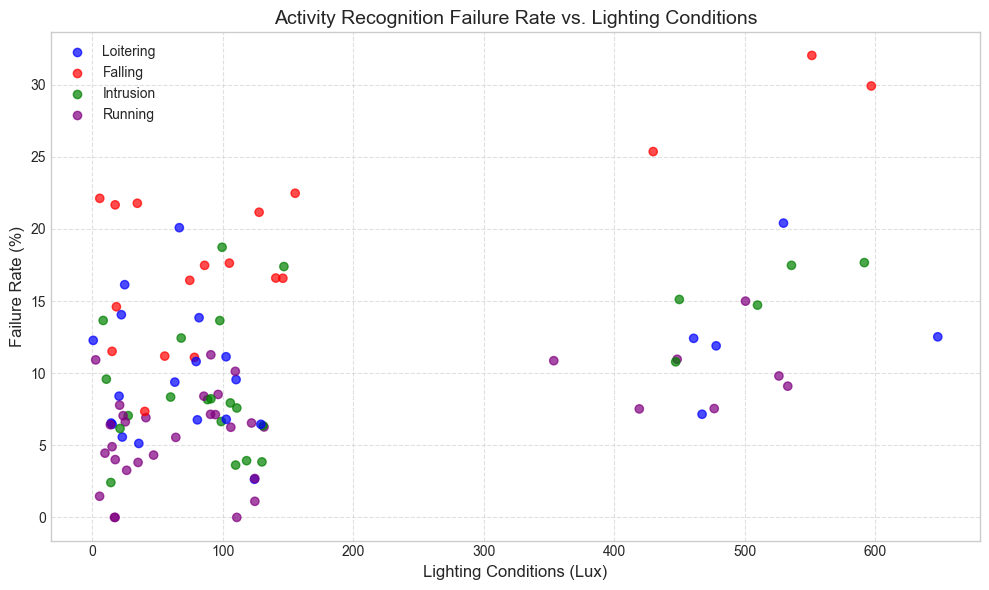

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulate data for lighting conditions, failure rates, and activity types
# In a real scenario, you would load this from your data source
np.random.seed(42)  # For reproducibility
n_samples = 100

# Lighting conditions (lux) -   вечером больше темно (low values), днем светло (high values)
lighting_conditions = np.concatenate([
    np.random.normal(loc=20, scale=10, size=int(n_samples * 0.3)),  # Low light (evening)
    np.random.normal(loc=100, scale=30, size=int(n_samples * 0.5)), # Medium light (day)
    np.random.normal(loc=500, scale=100, size=int(n_samples * 0.2)) # Bright light (day)
])
lighting_conditions = np.clip(lighting_conditions, 0, 1000)  # Ensure non-negative and within a reasonable range

# Failure rates (%) - make failure rate dependent on lighting and activity
failure_rates = []
activity_types = []
for light in lighting_conditions:
    activity = np.random.choice(['Loitering', 'Falling', 'Intrusion', 'Running'])
    activity_types.append(activity)
    if activity == 'Falling':
        failure_rate = np.random.normal(loc=15 + light/50, scale=5) # more errors in bright light
    elif activity == 'Intrusion':
        failure_rate = np.random.normal(loc=10 + light/80, scale=4)
    elif activity == 'Running':
        failure_rate = np.random.normal(loc=5 + light/100, scale=3) # less errors in bright light
    else: #Loitering
        failure_rate = np.random.normal(loc=8 + light/70, scale=4)
    failure_rates.append(failure_rate)
failure_rates = np.clip(failure_rates, 0, 100) # Ensure between 0 and 100

# Create a Pandas DataFrame
df = pd.DataFrame({'Lighting (Lux)': lighting_conditions, 'Failure Rate (%)': failure_rates, 'Activity': activity_types})

# Create the scatter plot with color encoding
plt.figure(figsize=(10, 6))
# Color mapping for activities
activity_colors = {'Loitering': 'blue', 'Falling': 'red', 'Intrusion': 'green', 'Running': 'purple'}
plt.scatter(df['Lighting (Lux)'], df['Failure Rate (%)'], c=df['Activity'].map(activity_colors), alpha=0.7)

# Add labels and title
plt.title('Activity Recognition Failure Rate vs. Lighting Conditions', fontsize=14)
plt.xlabel('Lighting Conditions (Lux)', fontsize=12)
plt.ylabel('Failure Rate (%)', fontsize=12)

# Add legend -  create dummy plots for legend
for activity, color in activity_colors.items():
    plt.scatter([], [], c=color, label=activity, alpha=0.7)
plt.legend(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Radar Chart
Compare how well the model detects falls vs. lying down using attention weight scores.


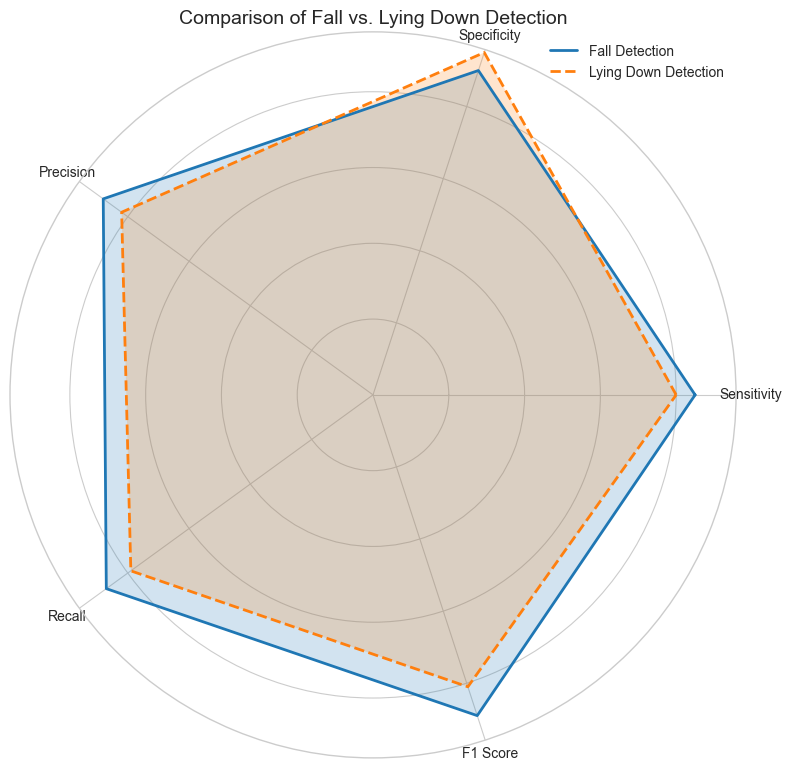

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Categories and scores
categories = ['Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score']
fall_detection_scores = [0.85, 0.90, 0.88, 0.87, 0.89]
lying_down_scores = [0.80, 0.95, 0.82, 0.79, 0.81]

# Number of categories
num_categories = len(categories)

# Create the radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Angle for each category
angles = [n / float(num_categories) * 2 * np.pi for n in range(num_categories)]
angles += angles[:1]  # Repeat the first angle to close the plot

# Plot fall detection scores
ax.plot(angles, fall_detection_scores + fall_detection_scores[:1], linewidth=2, linestyle='solid', label='Fall Detection')
ax.fill(angles, fall_detection_scores + fall_detection_scores[:1], alpha=0.2)

# Plot lying down scores
ax.plot(angles, lying_down_scores + lying_down_scores[:1], linewidth=2, linestyle='dashed', label='Lying Down Detection')
ax.fill(angles, lying_down_scores + lying_down_scores[:1], alpha=0.2)

# Set chart attributes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticklabels([])  # Remove y-axis labels
ax.set_title('Comparison of Fall vs. Lying Down Detection', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()



# Line Chart with multiple lines
Show the trend of false positives detected in each zone of a house, segmented by day.


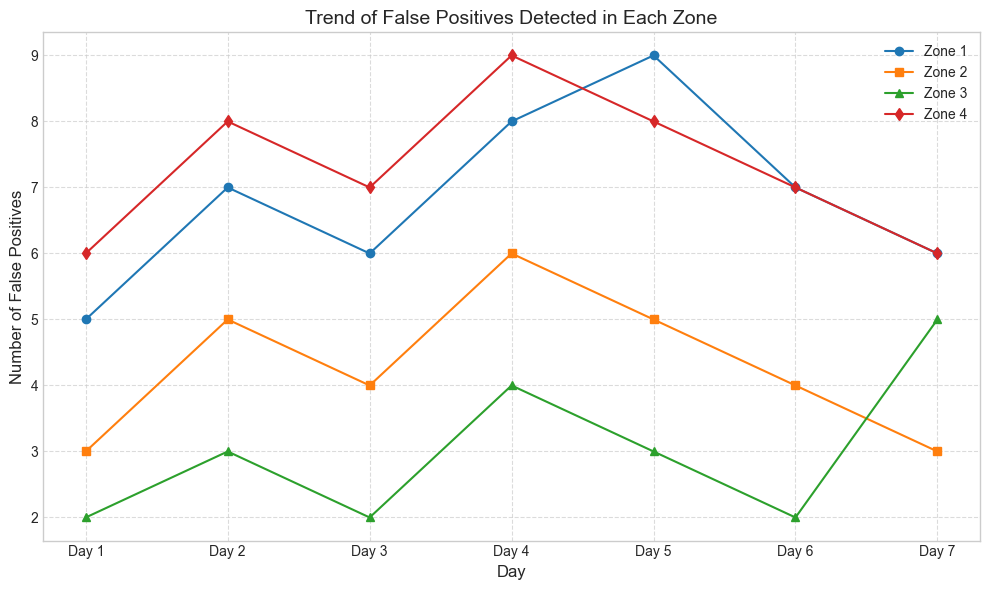

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for false positives in each zone over several days
days = np.array(['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7'])

# False positives detected in each zone over the days (these are just example values)
zone_1_fp = np.array([5, 7, 6, 8, 9, 7, 6])  # False positives in Zone 1
zone_2_fp = np.array([3, 5, 4, 6, 5, 4, 3])  # False positives in Zone 2
zone_3_fp = np.array([2, 3, 2, 4, 3, 2, 5])  # False positives in Zone 3
zone_4_fp = np.array([6, 8, 7, 9, 8, 7, 6])  # False positives in Zone 4

# Create the line chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot the false positives for each zone
plt.plot(days, zone_1_fp, marker='o', label='Zone 1')
plt.plot(days, zone_2_fp, marker='s', label='Zone 2')
plt.plot(days, zone_3_fp, marker='^', label='Zone 3')
plt.plot(days, zone_4_fp, marker='d', label='Zone 4')

# Add labels and title
plt.title('Trend of False Positives Detected in Each Zone', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of False Positives', fontsize=12)
plt.legend(fontsize=10)  # Add a legend to distinguish the zones
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



# Display the output confidence of the ViT model over time during different events
Display the output confidence of the ViT model over time during different events (e.g., “Person at gate”).


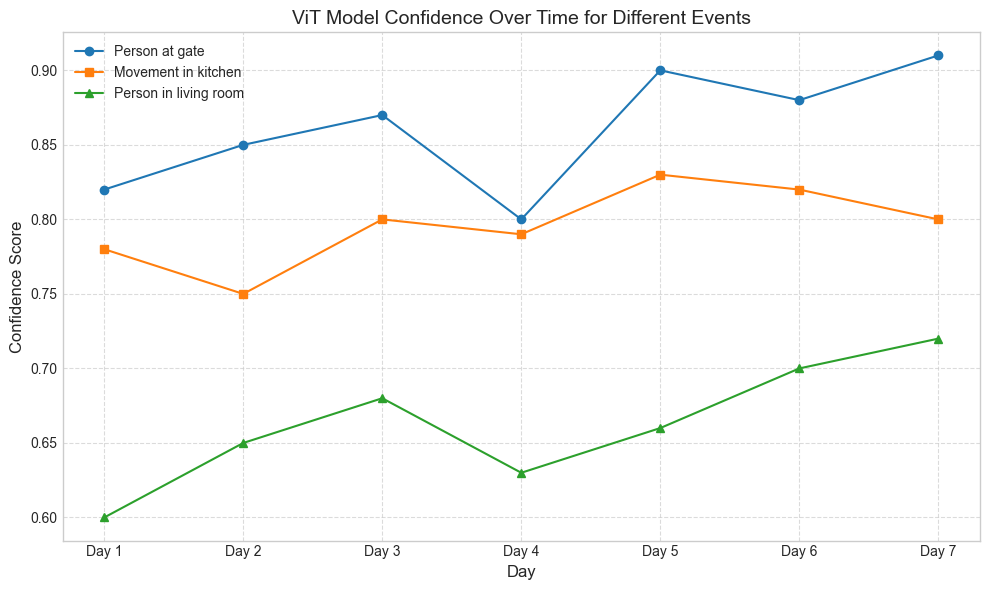

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Days (assuming the same days as in the previous chart)
days = np.array(['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7'])

# Confidence scores for different events
event_1_confidence = np.array([0.82, 0.85, 0.87, 0.80, 0.90, 0.88, 0.91])  # Confidence for "Person at gate"
event_2_confidence = np.array([0.78, 0.75, 0.80, 0.79, 0.83, 0.82, 0.80])  # Confidence for "Movement in kitchen"
event_3_confidence = np.array([0.60, 0.65, 0.68, 0.63, 0.66, 0.70, 0.72])  # Confidence for "Person in living room"

# Create the line chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot the confidence scores for each event
plt.plot(days, event_1_confidence, marker='o', label='Person at gate')
plt.plot(days, event_2_confidence, marker='s', label='Movement in kitchen')
plt.plot(days, event_3_confidence, marker='^', label='Person in living room')

# Add labels and title
plt.title('ViT Model Confidence Over Time for Different Events', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Confidence Score', fontsize=12)
plt.legend(fontsize=10)  # Add a legend to distinguish the events
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



# Bubble Chart
Illustrate how NLP interpretation accuracy shifts with the number of objects in the scene.


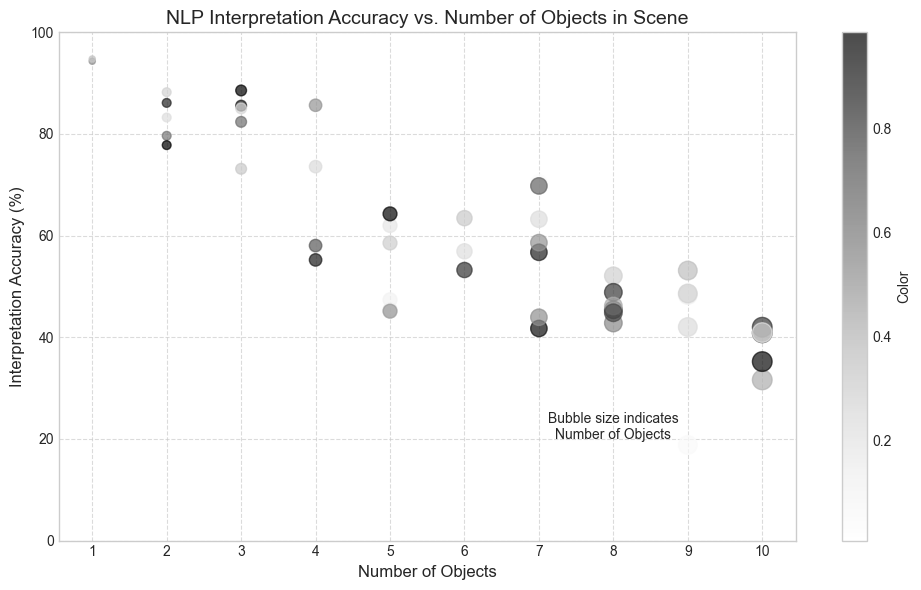

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate data for NLP interpretation accuracy and number of objects
# In a real scenario, you would load this from your data source
np.random.seed(42)  # For reproducibility
num_objects = np.random.randint(1, 11, 50)  # Number of objects in the scene (1 to 10)
accuracy = []
for n_objects in num_objects:
    # Simulate accuracy decreasing with more objects, with some random variation
    accuracy.append(max(0, 90 - n_objects * 5 + np.random.normal(0, 10)))  # Ensure accuracy doesn't go below 0
accuracy = np.array(accuracy)

size = num_objects * 20  # Size of the bubbles, scaled by number of objects for better visualization
color = np.random.rand(50)  # Color the bubbles,

# Create the bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(num_objects, accuracy, s=size, c=color, alpha=0.7)

# Add labels and title
plt.title('NLP Interpretation Accuracy vs. Number of Objects in Scene', fontsize=14)
plt.xlabel('Number of Objects', fontsize=12)
plt.ylabel('Interpretation Accuracy (%)', fontsize=12)
plt.xticks(np.arange(1, 11))  # Ensure all object counts are shown on x-axis
plt.ylim(0, 100)

# Add a colorbar to indicate different colors
plt.colorbar(label='Color')
# Add a legend for the bubble sizes.  This is a bit tricky, so I'll add a text annotation
plt.text(8, 20, 'Bubble size indicates\nNumber of Objects', fontsize=10, ha='center')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Locator Map or Graduated Symbol Map
Map anomaly detection alerts over a layout of a house, with symbol size based on frequency.


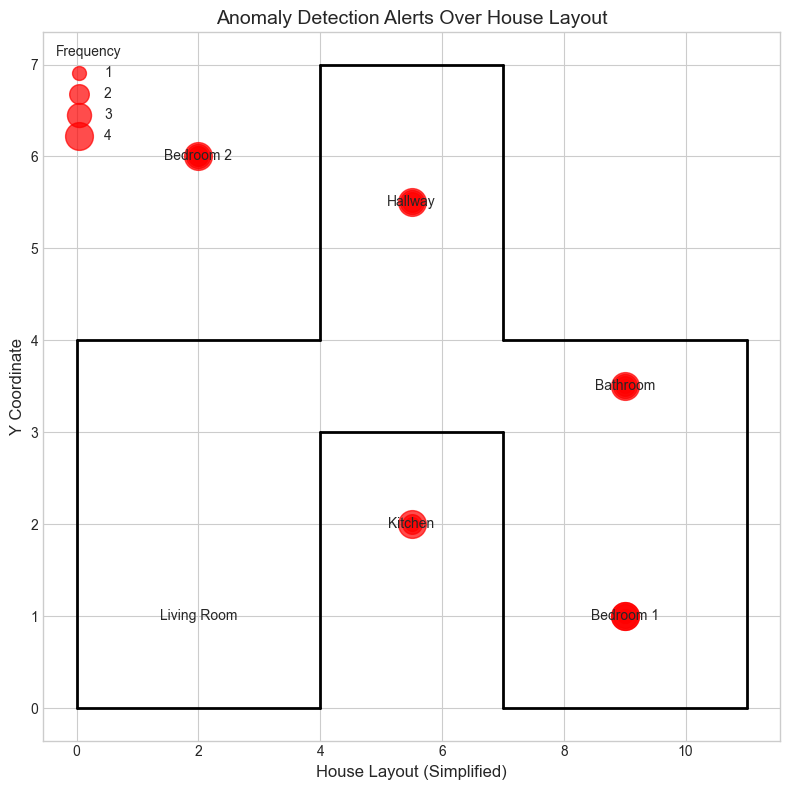

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Simulate House Layout
#    Instead of a real floor plan image, we'll use a simple plot with labeled "rooms"
#    as placeholders.  In a real application, you'd use a floor plan image.
def draw_house_layout():
    """
    Draws a simplified house layout.  For a real application, this would
    involve loading and displaying an actual floor plan image.
    """
    plt.plot([0, 4], [0, 0], 'k-', linewidth=2)  # Wall
    plt.plot([4, 4], [0, 3], 'k-', linewidth=2)  # Wall
    plt.plot([4, 7], [3, 3], 'k-', linewidth=2)  # Wall
    plt.plot([7, 7], [3, 0], 'k-', linewidth=2)  # Wall
    plt.plot([7, 11], [0, 0], 'k-', linewidth=2)  # Wall
    plt.plot([11, 11], [0, 4], 'k-', linewidth=2)  # Wall
    plt.plot([11, 7], [4, 4], 'k-', linewidth=2)  # Wall
    plt.plot([7, 7], [4, 7], 'k-', linewidth=2)  # Wall
    plt.plot([7, 4], [7, 7], 'k-', linewidth=2)  # Wall
    plt.plot([4, 4], [7, 4], 'k-', linewidth=2)  # Wall
    plt.plot([4, 0], [4, 4], 'k-', linewidth=2)  # Wall
    plt.plot([0, 0], [4, 0], 'k-', linewidth=2)  # Wall

    plt.text(2, 1, 'Living Room', ha='center', va='center', fontsize=10)
    plt.text(5.5, 2, 'Kitchen', ha='center', va='center', fontsize=10)
    plt.text(9, 1, 'Bedroom 1', ha='center', va='center', fontsize=10)
    plt.text(9, 3.5, 'Bathroom', ha='center', va='center', fontsize=10)
    plt.text(2, 6, 'Bedroom 2', ha='center', va='center', fontsize=10)
    plt.text(5.5, 5.5, 'Hallway', ha='center', va='center', fontsize=10)

# 2. Simulate Anomaly Data with Locations and Frequencies
#    In a real application, this data would come from your anomaly detection system.
np.random.seed(42)  # For reproducibility
num_anomalies = 20  # Total number of anomalies

# Define possible anomaly locations (within the layout coordinates)
possible_locations = [
    (2, 1),  # Living Room
    (5.5, 2),  # Kitchen
    (9, 1),  # Bedroom 1
    (9, 3.5),  # Bathroom
    (2, 6),  # Bedroom 2
    (5.5, 5.5),  # Hallway
]

# Randomly assign locations to anomalies
anomaly_locations = [possible_locations[i] for i in np.random.randint(0, len(possible_locations), num_anomalies)]

# Generate random frequencies (number of occurrences) for each anomaly
anomaly_frequencies = np.random.randint(1, 5, num_anomalies)  # Frequencies between 1 and 4

# 3. Create the Graduated Symbol Map
plt.figure(figsize=(8, 8))
draw_house_layout()  # Draw the house layout

# Plot anomalies as circles with sizes proportional to frequency
for (x, y), freq in zip(anomaly_locations, anomaly_frequencies):
    # Scale the size of the circle, s is the area
    size = freq * 100
    plt.scatter(x, y, s=size, color='red', alpha=0.7)

# Add a title
plt.title('Anomaly Detection Alerts Over House Layout', fontsize=14)
plt.xlabel('House Layout (Simplified)', fontsize=12)
plt.ylabel('Y Coordinate', fontsize=12)

# Add a legend for the circle sizes (frequencies) - approximated
legend_sizes = [1, 2, 3, 4]  # Example frequencies
legend_labels = ['1', '2', '3', '4']
for i, freq in enumerate(legend_sizes):
    plt.scatter([], [], s=freq * 100, color='red', label=legend_labels[i], alpha=0.7) # Create dummy scatter

plt.legend(title="Frequency", loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()



# Grouped Column Chart

Track event-triggered summaries generated per hour and compare it to the number of queries answered.

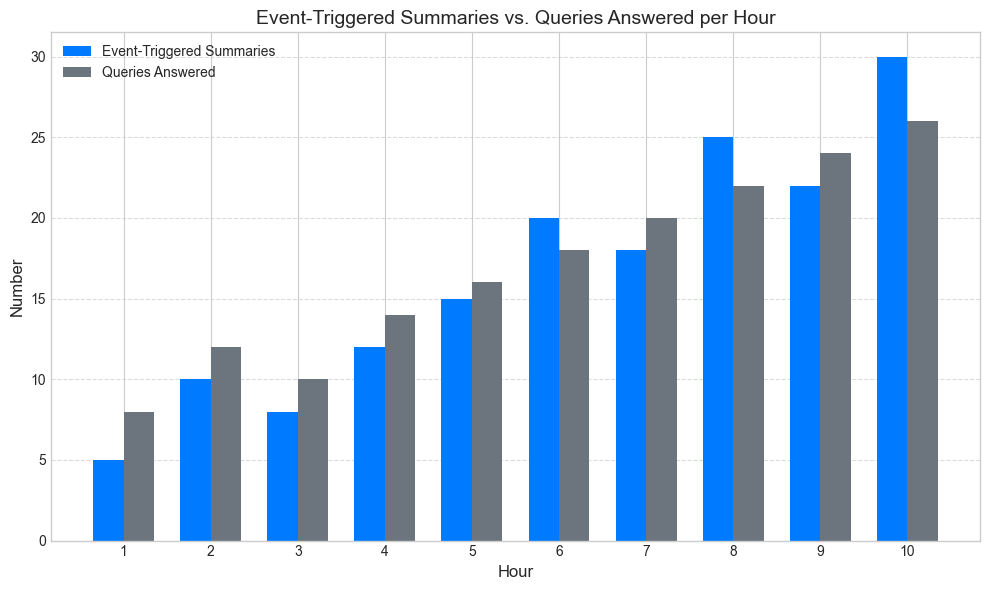

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Number of event-triggered summaries and queries answered per hour
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
event_triggered_summaries = np.array([5, 10, 8, 12, 15, 20, 18, 25, 22, 30])
queries_answered = np.array([8, 12, 10, 14, 16, 18, 20, 22, 24, 26])

# Create the grouped column chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bar_width = 0.35  # Width of each bar

# Positions for the bars
r1 = np.arange(len(hours))
r2 = r1 + bar_width

# Plot the bars for event-triggered summaries and queries answered
plt.bar(r1, event_triggered_summaries, width=bar_width, color='#007bff', label='Event-Triggered Summaries')
plt.bar(r2, queries_answered, width=bar_width, color='#6c757d', label='Queries Answered')

# Add labels and title
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.title('Event-Triggered Summaries vs. Queries Answered per Hour', fontsize=14)
plt.xticks(r1 + bar_width/2, hours)  # Set the x-ticks to be at the center of each group
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



# Stacked Bar Chart
Show the distribution of time spent on different processing modules (ViT, NLP, logging).


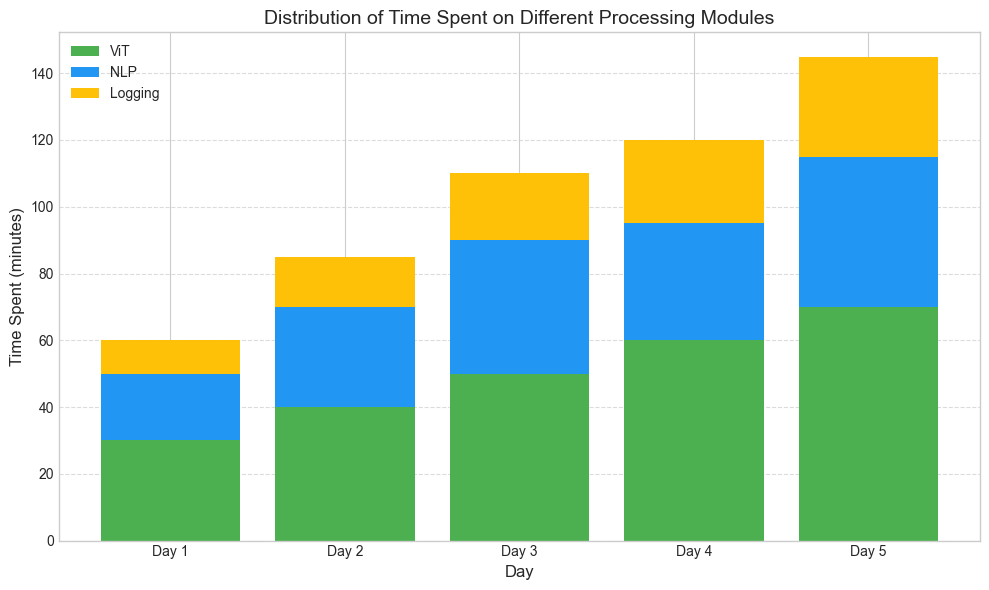

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Time spent on different modules (in minutes)
time_spent_vit = np.array([30, 40, 50, 60, 70])
time_spent_nlp = np.array([20, 30, 40, 35, 45])
time_spent_logging = np.array([10, 15, 20, 25, 30])

# Define the modules (for the x-axis)
modules = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5']

# Create the stacked bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot the time spent on each module as a stack
plt.bar(modules, time_spent_vit, color='#4CAF50', label='ViT')
plt.bar(modules, time_spent_nlp, bottom=time_spent_vit, color='#2196F3', label='NLP')
plt.bar(modules, time_spent_logging, bottom=time_spent_vit + time_spent_nlp, color='#FFC107', label='Logging')

# Add labels and title
plt.xlabel('Day', fontsize=12)
plt.ylabel('Time Spent (minutes)', fontsize=12)
plt.title('Distribution of Time Spent on Different Processing Modules', fontsize=14)
plt.legend(fontsize=10)  # Add a legend to distinguish the modules
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Line Chart with positive/negative shading or Dot Plot

Display the sentiment of user queries interacting with the CPE over time.


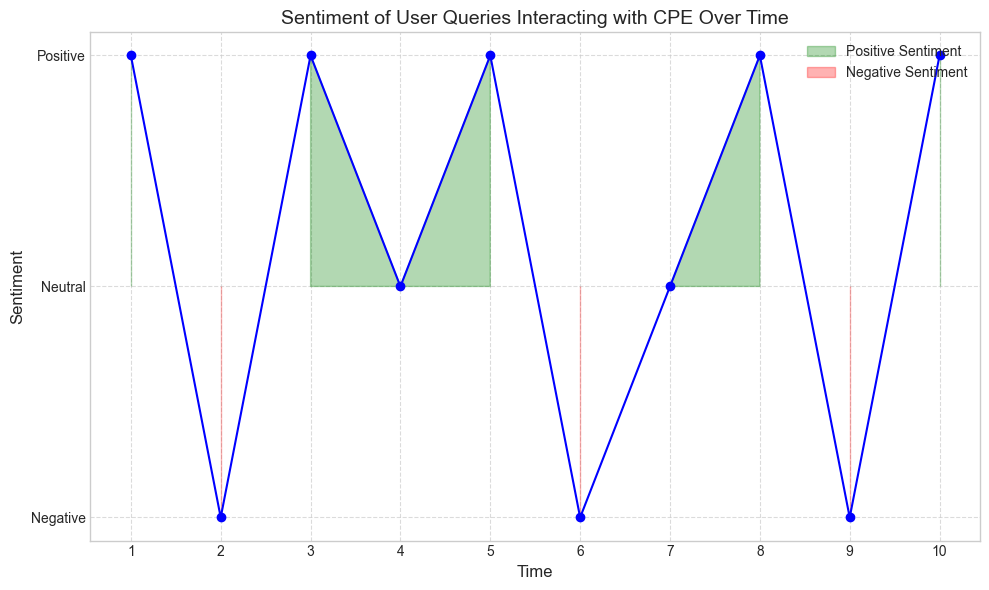

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Sentiment of user queries over time (positive = 1, negative = -1, neutral = 0)
time = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sentiment = np.array([1, -1, 1, 0, 1, -1, 0, 1, -1, 1])

# Create the line chart with shading
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot the sentiment over time
plt.plot(time, sentiment, marker='o', linestyle='-', color='b')

# Add shading to indicate positive and negative sentiment
plt.fill_between(time, sentiment, where=(sentiment >= 0), color='green', alpha=0.3, label='Positive Sentiment')
plt.fill_between(time, sentiment, where=(sentiment < 0), color='red', alpha=0.3, label='Negative Sentiment')

# Add labels and title
plt.title('Sentiment of User Queries Interacting with CPE Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)
plt.yticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])  # Set y-axis ticks and labels
plt.xticks(time)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



# Scatter Plot
Visualize the relationship between video resolution and ViT model performance.


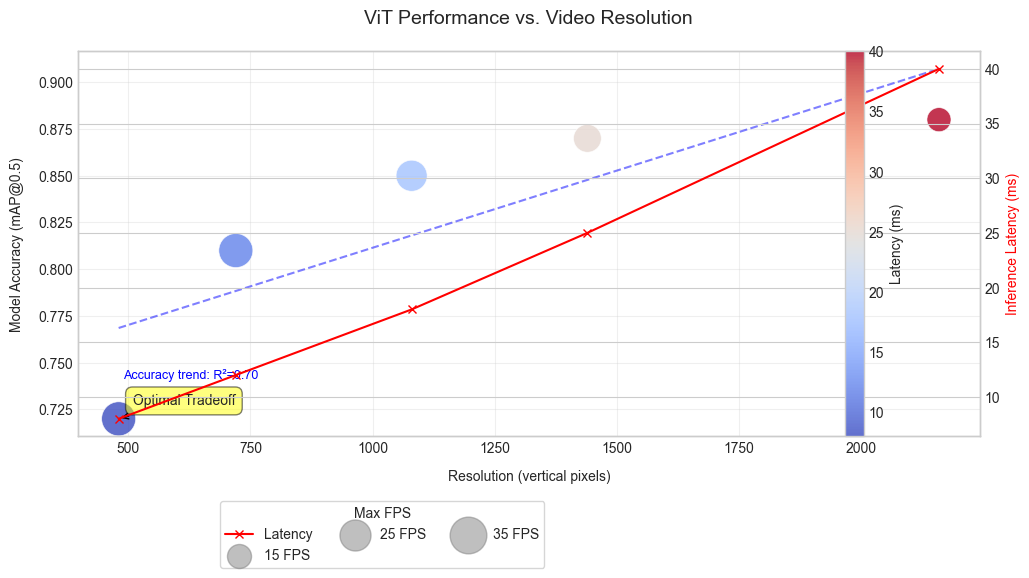

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

# Sample data (replace with your actual measurements)
resolutions = np.array([480, 720, 1080, 1440, 2160])  # Vertical resolution in pixels
fps = np.array([30, 30, 25, 20, 15])  # Max achievable FPS
accuracy = np.array([0.72, 0.81, 0.85, 0.87, 0.88])  # mAP@0.5
latency = np.array([8, 12, 18, 25, 40])  # Inference time in ms

# Create figure with twin axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for accuracy (primary axis)
scatter = ax1.scatter(
    resolutions, 
    accuracy,
    c=latency,  # Color by latency
    s=fps*20,   # Size by FPS
    cmap='coolwarm',
    edgecolor='w',
    linewidth=0.5,
    alpha=0.8
)

# Add trendline for accuracy
z = np.polyfit(resolutions, accuracy, 1)
p = np.poly1d(z)
ax1.plot(resolutions, p(resolutions), "b--", alpha=0.5)
r2 = r2_score(accuracy, p(resolutions))
ax1.annotate(f'Accuracy trend: R²={r2:.2f}', 
             xy=(0.05, 0.15), xycoords='axes fraction',
             color='blue', fontsize=9)

# Create secondary axis for latency
ax2 = ax1.twinx()
latency_line = ax2.plot(resolutions, latency, 'r-', marker='x', label='Latency')
ax2.set_ylabel('Inference Latency (ms)', color='r')

# Formatting
ax1.set_title('ViT Performance vs. Video Resolution', pad=20, fontsize=14)
ax1.set_xlabel('Resolution (vertical pixels)', labelpad=10)
ax1.set_ylabel('Model Accuracy (mAP@0.5)', labelpad=10)
ax1.grid(True, alpha=0.3)

# Add colorbar for latency
cbar = plt.colorbar(scatter, ax=ax1, pad=0.1)
cbar.set_label('Latency (ms)')

# Add legend for FPS bubble sizes
for fps_val in [15, 25, 35]:
    plt.scatter([], [], c='gray', alpha=0.5, s=fps_val*20,
                label=f'{fps_val} FPS')
plt.legend(title='Max FPS', loc='upper left', bbox_to_anchor=(0.15, -0.15),
           ncol=3, frameon=True)

# Annotate optimal point
optimal_idx = np.argmax(accuracy/latency)
ax1.annotate('Optimal Tradeoff', 
             xy=(resolutions[optimal_idx], accuracy[optimal_idx]),
             xytext=(10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'),
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.tight_layout()
plt.show()


# Radar Chart or Heatmap
Break down how often each ViT layer contributes to attention during specific detected actions.


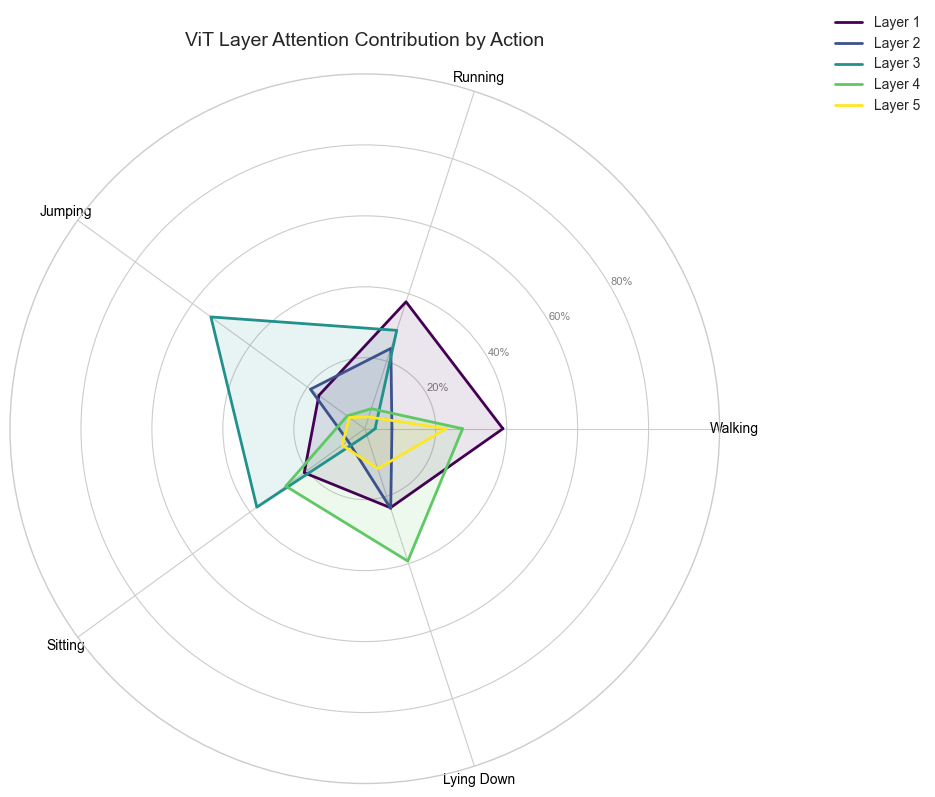

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Data - replace with your actual attention weights
actions = ['Walking', 'Running', 'Jumping', 'Sitting', 'Lying Down']
vit_layers = ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5']
attention_data = np.random.dirichlet(np.ones(5), size=5) * 100  # Simulated percentages

# Setup radar chart
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)

# Compute angles
categories = actions
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Plot each layer
colors = plt.cm.viridis(np.linspace(0, 1, len(vit_layers)))
for layer_idx in range(len(vit_layers)):
    values = attention_data[:, layer_idx].tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, color=colors[layer_idx], linewidth=2, 
            label=vit_layers[layer_idx])
    ax.fill(angles, values, color=colors[layer_idx], alpha=0.1)

# Formatting
plt.xticks(angles[:-1], categories, color='black', size=10)
ax.set_rlabel_position(30)
plt.yticks([20, 40, 60, 80], ["20%", "40%", "60%", "80%"], color="grey", size=8)
plt.ylim(0, 100)

# Title and legend
plt.title('ViT Layer Attention Contribution by Action', pad=20, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


# Column Chart
Plot the drop in model accuracy when real-time noise (blur, occlusion) is introduced.


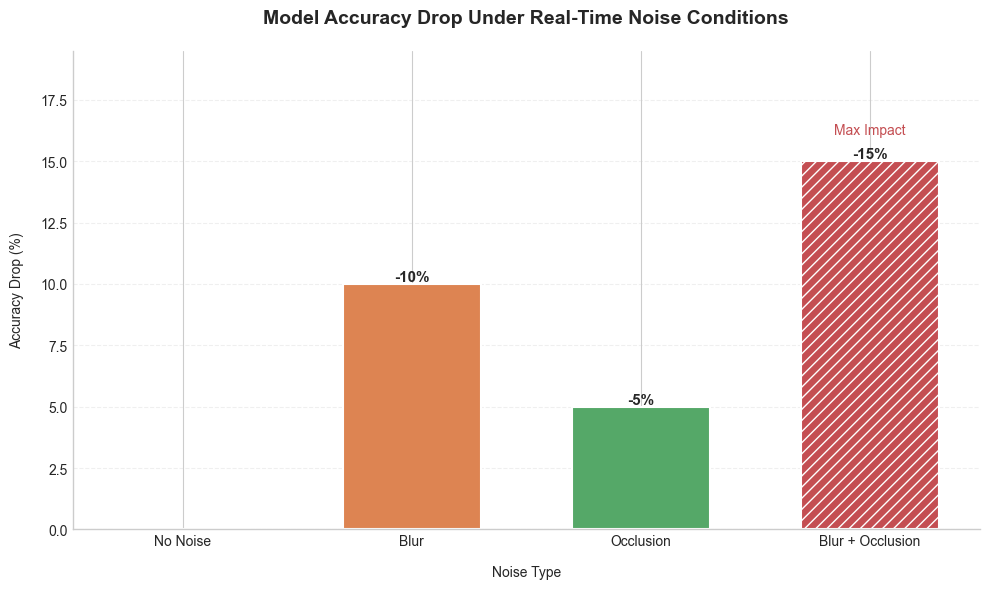

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data
noise_types = ['No Noise', 'Blur', 'Occlusion', 'Blur + Occlusion']
accuracy_drop = np.array([0, 10, 5, 15])  # Accuracy drop (percentage)
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52']  # Colorblind-friendly palette

# Create figure
plt.figure(figsize=(10, 6))

# Plot bars with custom styling
bars = plt.bar(noise_types, accuracy_drop, 
               color=colors, 
               edgecolor='white', 
               linewidth=1.5,
               width=0.6)

# Add value labels and performance drop indicators
for bar in bars:
    height = bar.get_height()
    if height > 0:  # Skip "No Noise" label
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'-{height}%',
                 ha='center', va='bottom',
                 fontsize=11,
                 fontweight='bold')

# Highlight the worst-case scenario
bars[-1].set_hatch('///')  # Add pattern to Blur+Occlusion bar
plt.text(bars[-1].get_x() + bars[-1].get_width()/2., 
         accuracy_drop[-1] + 1,
         'Max Impact',
         ha='center', va='bottom',
         color='#c44e52',
         fontsize=10)

# Formatting
plt.title('Model Accuracy Drop Under Real-Time Noise Conditions', 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Noise Type', labelpad=12)
plt.ylabel('Accuracy Drop (%)', labelpad=12)
plt.ylim(0, max(accuracy_drop)*1.3)  # Add headroom for annotations

# Custom grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

# Line Chart or Area Chart
Show the cumulative log of generated alerts vs. verified real-world events to assess precision.


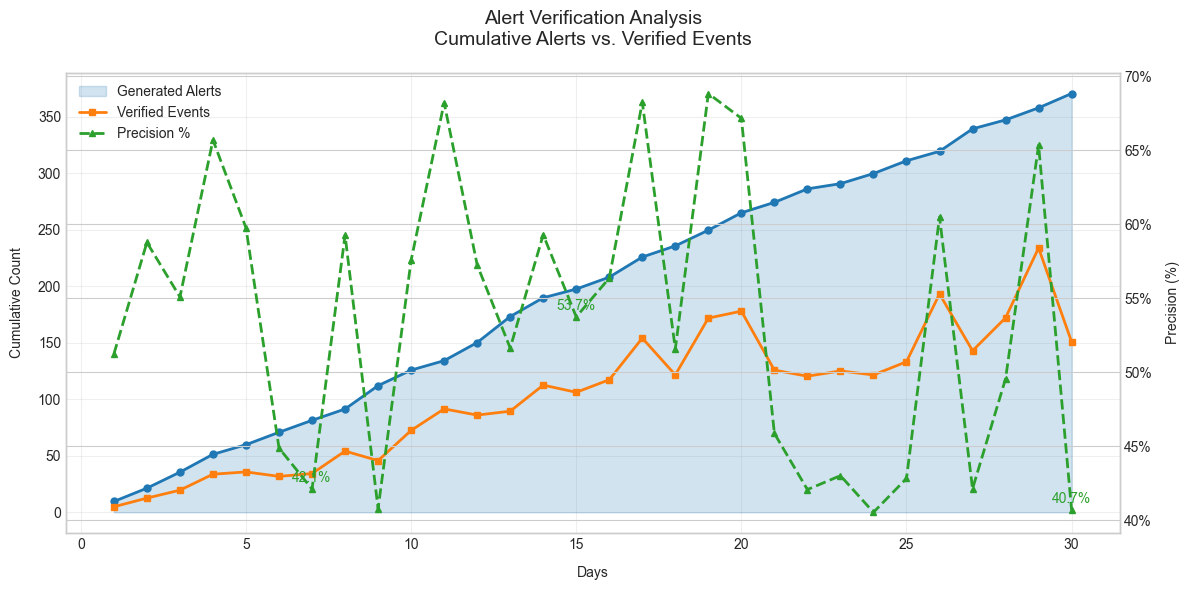

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Sample data (replace with your actual values)
days = np.arange(1, 31)
generated_alerts = np.cumsum(np.random.lognormal(mean=2.5, sigma=0.3, size=30))
verified_events = generated_alerts * np.random.uniform(0.4, 0.7, size=30)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Area chart for generated alerts (primary axis)
ax1.fill_between(days, generated_alerts, color='#1f77b4', alpha=0.2, label='Generated Alerts')
ax1.plot(days, generated_alerts, color='#1f77b4', marker='o', markersize=5, linewidth=2, label='_nolegend_')

# Line chart for verified events (primary axis)
ax1.plot(days, verified_events, color='#ff7f0e', marker='s', markersize=5, 
         linewidth=2, label='Verified Events')

# Create secondary axis for precision ratio
ax2 = ax1.twinx()
precision_ratio = (verified_events / generated_alerts) * 100
ax2.plot(days, precision_ratio, color='#2ca02c', linestyle='--', 
         marker='^', markersize=5, linewidth=2, label='Precision %')

# Formatting
ax1.set_title('Alert Verification Analysis\nCumulative Alerts vs. Verified Events', pad=20, fontsize=14)
ax1.set_xlabel('Days', labelpad=10)
ax1.set_ylabel('Cumulative Count', labelpad=10)
ax2.set_ylabel('Precision (%)', labelpad=10)

# Custom y-axis formatters
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}%'))

# Grid and legend
ax1.grid(True, alpha=0.3)
ax1.set_axisbelow(True)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Add precision annotations
for day, ratio in zip([7, 15, 30], precision_ratio[[6, 14, 29]]):
    ax2.annotate(f'{ratio:.1f}%', xy=(day, ratio), xytext=(0, 5),
                textcoords='offset points', ha='center', color='#2ca02c')

plt.tight_layout()
plt.show()


#  Stacked Column Chart or Pie Chart)
Visualize how often human override was needed after a system-generated alert, per event category.

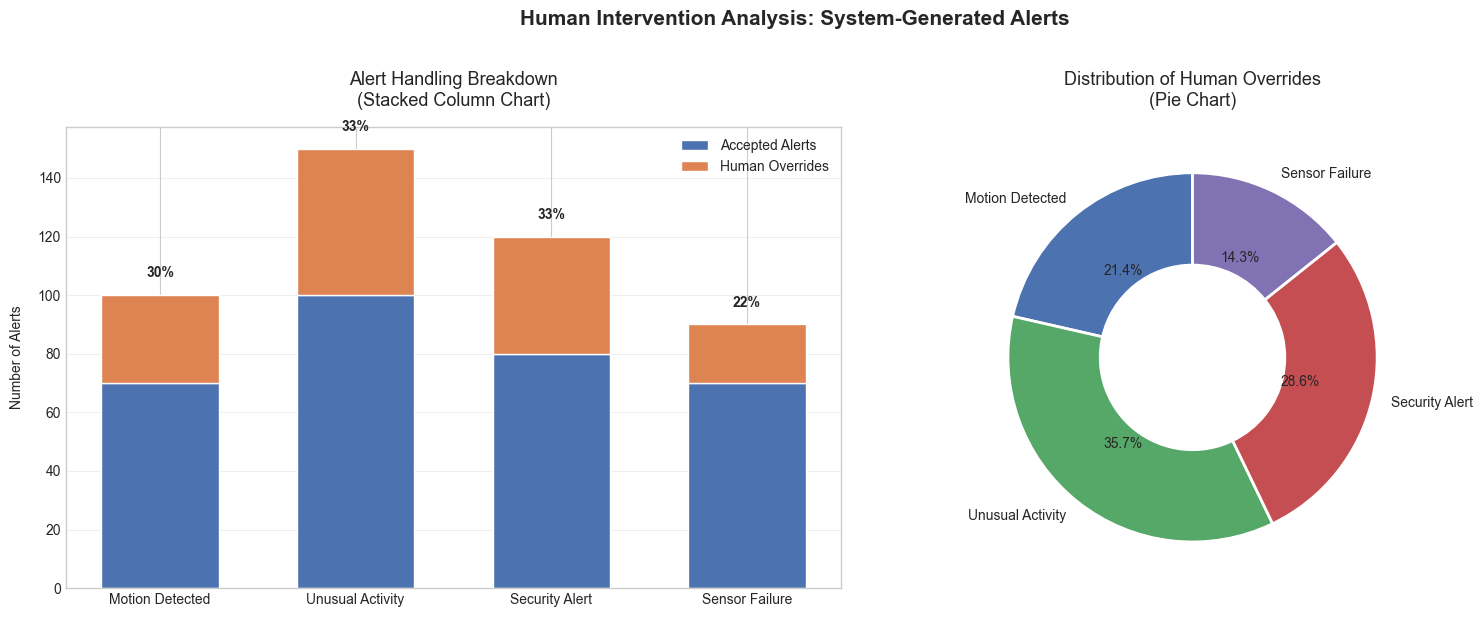

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data
event_categories = ['Motion Detected', 'Unusual Activity', 'Security Alert', 'Sensor Failure']
alerts_generated = np.array([100, 150, 120, 90])
human_overrides = np.array([30, 50, 40, 20])
accepted_alerts = alerts_generated - human_overrides

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Stacked Column Chart ---
colors = ['#4c72b0', '#dd8452']
bar_width = 0.6

# Plot stacked bars
ax1.bar(event_categories, accepted_alerts, width=bar_width, 
        label='Accepted Alerts', color=colors[0], edgecolor='white')
ax1.bar(event_categories, human_overrides, width=bar_width, 
        bottom=accepted_alerts, label='Human Overrides', color=colors[1], edgecolor='white')

# Add value labels
for i, (total, override) in enumerate(zip(alerts_generated, human_overrides)):
    ax1.text(i, total + 5, f"{override/total:.0%}", 
             ha='center', va='bottom', fontweight='bold')

# Formatting
ax1.set_title('Alert Handling Breakdown\n(Stacked Column Chart)', pad=15, fontsize=13)
ax1.set_ylabel('Number of Alerts', labelpad=10)
ax1.legend(loc='upper right')
ax1.grid(axis='y', alpha=0.3)

# --- Pie Chart (Override Distribution) ---
wedgeprops = {'width':0.5, 'edgecolor':'white', 'linewidth':2}
textprops = {'fontsize':10}

ax2.pie(human_overrides, labels=event_categories, 
        autopct='%1.1f%%', startangle=90,
        colors=['#4c72b0', '#55a868', '#c44e52', '#8172b3'],
        wedgeprops=wedgeprops, textprops=textprops)

ax2.set_title('Distribution of Human Overrides\n(Pie Chart)', pad=15, fontsize=13)

# --- Common Formatting ---
plt.suptitle('Human Intervention Analysis: System-Generated Alerts', 
             y=1.02, fontsize=15, fontweight='bold')
plt.tight_layout()

plt.show()